# Images Exploration and Visualization

## 📌 Notebook Objective  

This notebook focuses on **exploring the image data** available in the dataset.  
We will:  
✔ **Load structured data** (`X_full_train` and `X_test`).  
✔ **Generate image filenames** to link each entry to its corresponding image file.  
✔ **Verify the availability of image files** in the dataset.  
✔ **Analyze image properties** (size, format,color mode, brightness & contrast).  
✔ **Display a selection of product images** to assess their quality and consistency.  

Understanding the image data structure is crucial before integrating it into **our modeling pipeline**.  


## 1. Load `X_full_train` and `X_test (Pickle Files) 

In [25]:
import os
import pandas as pd

# Define file paths for Pickle files
train_pickle_path = "../data/interim/X_full_train.pkl"
test_pickle_path = "../data/interim/X_test.pkl"


# Function to load a Pickle file safely
def load_pickle(file_path, dataset_name):
    if os.path.exists(file_path):
        try:
            data = pd.read_pickle(file_path)
            print(f"Successfully loaded `{dataset_name}` | Shape: {data.shape}\n")
            display(data.head())  # Display first few rows
            return data
        except Exception as e:
            print(f"Error loading `{dataset_name}`: {e}")
    else:
        print(f"File not found: {file_path}")
    return None

# Load both datasets
X_full_train = load_pickle(train_pickle_path, "X_full_train.pkl")
X_test = load_pickle(test_pickle_path, "X_test.pkl")


Successfully loaded `X_full_train.pkl` | Shape: (84916, 5)



designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   prdtypecode  
0           10  
1         2280  
2           50  
3         1280  
4         2705

Successfully loaded `X_test.pkl` | Shape: (13812, 4)



designation  \
84916  Folkmanis Puppets - 2732 - Marionnette Et Théâ...   
84917  Porte Flamme Gaxix - Flamebringer Gaxix - 136/...   
84918                  Pompe de filtration Speck Badu 95   
84919                        Robot de piscine électrique   
84920  Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...   

                                             description   productid  \
84916                                                NaN   516376098   
84917                                                NaN   133389013   
84918                                                NaN  4128438366   
84919  <p>Ce robot de piscine d&#39;un design innovan...  3929899732   
84920                                                NaN   152993898   

          imageid  
84916  1019294171  
84917  1274228667  
84918  1295960357  
84919  1265224052  
84920   940543690

## 2. Generating Image Filenames  

The dataset provides **only image identifiers** (`imageid`) and **product identifiers** (`productid`) without direct file paths.  

To properly **link each product to its corresponding image file**, we generate filenames using the **naming convention**:  

📌 **Format:**  
`image_<imageid>_product_<productid>.jpg`  

📌 **Example:**  
For `imageid = 1263597046` and `productid = 436067568`, the corresponding image file will be:  
`image_1263597046_product_436067568.jpg`  

This step ensures that each row in **both training (`X_full_train`) and test (`X_test`) datasets** is correctly mapped to its image.


In [2]:
# Generate image filenames based on imageid and productid for training set
X_full_train["image_name"] = (
    "image_" + X_full_train["imageid"].astype(str) +
    "_product_" + X_full_train["productid"].astype(str) +
    ".jpg"
)

# Generate image filenames for test set
X_test["image_name"] = (
    "image_" + X_test["imageid"].astype(str) +
    "_product_" + X_test["productid"].astype(str) +
    ".jpg"
)

# Display samples to verify the format
print("Sample training image filenames:")
display(X_full_train[["imageid", "productid", "image_name"]].head())

print("\nSample test image filenames:")
display(X_test[["imageid", "productid", "image_name"]].head())


Sample training image filenames:


imageid   productid                               image_name
0  1263597046  3804725264  image_1263597046_product_3804725264.jpg
1  1008141237   436067568   image_1008141237_product_436067568.jpg
2   938777978   201115110    image_938777978_product_201115110.jpg
3   457047496    50418756     image_457047496_product_50418756.jpg
4  1077757786   278535884   image_1077757786_product_278535884.jpg


Sample test image filenames:


imageid   productid                               image_name
84916  1019294171   516376098   image_1019294171_product_516376098.jpg
84917  1274228667   133389013   image_1274228667_product_133389013.jpg
84918  1295960357  4128438366  image_1295960357_product_4128438366.jpg
84919  1265224052  3929899732  image_1265224052_product_3929899732.jpg
84920   940543690   152993898    image_940543690_product_152993898.jpg

## 3. Verifying Image Availability  

Before proceeding with image analysis, we must ensure that **all expected image files exist** in the dataset.

### 3.1 Checking Image Availability for Training Data  

In [3]:
import os

# Define the directory for training images
train_image_dir = "../data/raw/images/image_train/"

# Get the list of actual images in the training folder
existing_train_images = set(os.listdir(train_image_dir))

# Check for missing and extra images in the training set
missing_train_images = set(X_full_train["image_name"]) - existing_train_images
extra_train_images = existing_train_images - set(X_full_train["image_name"])

print(f"Training Data - Expected Images: {len(X_full_train)}")
print(f"Training Data - Images Found in Folder: {len(existing_train_images)}")
print(f"Training Data - Missing Images: {len(missing_train_images)}")
print(f"Training Data - Extra Images Not in Dataset: {len(extra_train_images)}")

if missing_train_images:
    print("\n🔍 Sample missing training images:")
    print(list(missing_train_images)[:10])

if extra_train_images:
    print("\n⚠️ Sample extra training images not in dataset:")
    print(list(extra_train_images)[:10])


Training Data - Expected Images: 84916
Training Data - Images Found in Folder: 84916
Training Data - Missing Images: 0
Training Data - Extra Images Not in Dataset: 0


### 3.2 Checking Image Availability for Testing Data  

In [4]:
import os

# Define the directory for test images
test_image_dir = "../data/raw/images/image_test/"

# Get the list of actual images in the test folder
existing_test_images = set(os.listdir(test_image_dir))

# Check for missing and extra images in the test set
missing_test_images = set(X_test["image_name"]) - existing_test_images
extra_test_images = existing_test_images - set(X_test["image_name"])

print(f"Testing Data - Expected Images: {len(X_test)}")
print(f"Testing Data - Images Found in Folder: {len(existing_test_images)}")
print(f"Testing Data - Missing Images: {len(missing_test_images)}")
print(f"Testing Data - Extra Images Not in Dataset: {len(extra_test_images)}")

if missing_test_images:
    print("\nSample missing test images:")
    print(list(missing_test_images)[:10])

if extra_test_images:
    print("\nSample extra test images not in dataset:")
    print(list(extra_test_images)[:10])


Testing Data - Expected Images: 13812
Testing Data - Images Found in Folder: 13812
Testing Data - Missing Images: 0
Testing Data - Extra Images Not in Dataset: 0


## 4. Image Properties Analysis  

### 4.1 Image Size & Format in Training and Testing Data  

In [5]:
import os
from PIL import Image


# Define image directories
train_image_dir = "../data/raw/images/image_train/"
test_image_dir = "../data/raw/images/image_test/"


def analyze_image_properties(df, image_dir, dataset_name="Dataset"):
    """
    Analyze image properties (size & format) for a given dataset.

    Parameters:
    - df (pd.DataFrame): DataFrame containing image filenames.
    - image_dir (str): Path to the directory containing images.
    - dataset_name (str): Name of the dataset for display purposes.

    Returns:
    - Prints summary of image sizes and formats.
    """
    image_sizes = []
    image_formats = []

    for img_name in df["image_name"]:
        img_path = os.path.join(image_dir, img_name)

        # Try opening the image and extracting properties
        try:
            with Image.open(img_path) as img:
                image_sizes.append(img.size)  # (width, height)
                image_formats.append(img.format)  # JPEG, PNG, etc.
        except Exception as e:
            print(f"Skipping {img_name} (corrupt or missing): {e}")

    # Check unique values
    unique_sizes = set(image_sizes)
    unique_formats = set(image_formats)

    print(f"\n{dataset_name} - Total images analyzed: {len(image_sizes)}")

    # Image size verification
    if len(unique_sizes) == 1:
        print(f"All images have the same size: {unique_sizes.pop()}")
    else:
        print(f" Detected {len(unique_sizes)} different image sizes.")
        print(f" Sample unique sizes: {list(unique_sizes)[:5]}")  # Display first 5 unique sizes

    # Image format verification
    if len(unique_formats) == 1:
        print(f"All images have the same format: {unique_formats.pop()}")
    else:
        print(f" Detected {len(unique_formats)} different image formats.")
        print(f"Sample unique formats: {list(unique_formats)}")  # Display all detected formats

        
        
# Run the analysis for training images
analyze_image_properties(X_full_train, train_image_dir, dataset_name="Training Data")

# Run the analysis for testing images
analyze_image_properties(X_test, test_image_dir, dataset_name="Testing Data")


Training Data - Total images analyzed: 84916
All images have the same size: (500, 500)
All images have the same format: JPEG

Testing Data - Total images analyzed: 13812
All images have the same size: (500, 500)
All images have the same format: JPEG


### 4.2 Check Image Color Mode for Training and Testing Data  

In [6]:
import os
from PIL import Image
import pandas as pd

# Define image directories for training and testing
image_dir_train = "../data/raw/images/image_train/"  # Adjust if needed
image_dir_test = "../data/raw/images/image_test/"    # Adjust if needed

def check_image_color_mode(df, image_dir):
    """
    Check whether images are in color (RGB) or grayscale (L).

    Parameters:
    - df (pd.DataFrame): DataFrame containing image names.
    - image_dir (str): Path to the directory containing the images.

    Returns:
    - DataFrame with an additional column 'color_mode' indicating "RGB" or "Grayscale".
    - Summary count of RGB vs. Grayscale images.
    """
    color_modes = []

    for img_name in df["image_name"]:
        img_path = os.path.join(image_dir, img_name)
        
        if os.path.exists(img_path):  # Ensure the image exists before processing
            try:
                with Image.open(img_path) as img:
                    color_modes.append(img.mode)  # Store mode (RGB or L)
            except Exception as e:
                print(f"Error loading {img_name}: {e}")
                color_modes.append("Error")  # Mark problematic images
        else:
            color_modes.append("Missing")  # Mark missing files

    # Add the results to the DataFrame
    df["color_mode"] = color_modes

    # Compute summary statistics
    summary = df["color_mode"].value_counts()
    total_images = len(df)

    print(f"\n Image Color Mode Summary for {image_dir}:")
    for mode, count in summary.items():
        percentage = (count / total_images) * 100
        print(f"{mode}: {count} images ({percentage:.2f}%)")

    print(f"Total images examined: {total_images}")

    return df

# Run the function separately for training and testing sets
X_full_train = check_image_color_mode(X_full_train, image_dir_train)
X_test = check_image_color_mode(X_test, image_dir_test)



 Image Color Mode Summary for ../data/raw/images/image_train/:
RGB: 84916 images (100.00%)
Total images examined: 84916

 Image Color Mode Summary for ../data/raw/images/image_test/:
RGB: 13812 images (100.00%)
Total images examined: 13812


### 4.3 Analyzing Brightness & Contrast for Training and Testing Data  

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def analyze_brightness_contrast(df, image_dir, dataset_name="Dataset"):
    """
    Analyze brightness and contrast of images in a dataset.

    Parameters:
    - df (pd.DataFrame): DataFrame containing image filenames.
    - image_dir (str): Path to the directory containing images.
    - dataset_name (str): Name of the dataset for display purposes.

    Returns:
    - Prints summary statistics for brightness and contrast.
    - Displays histograms for brightness and contrast distribution.
    """
    brightness_values = []
    contrast_values = []

    for img_name in df["image_name"]:
        img_path = os.path.join(image_dir, img_name)

        # Check if file exists before processing
        if os.path.exists(img_path):
            try:
                with Image.open(img_path) as img:
                    img_gray = img.convert("L")  # Convert to grayscale for analysis
                    img_array = np.array(img_gray)

                    # Compute brightness (mean pixel intensity)
                    brightness = img_array.mean()

                    # Compute contrast (standard deviation of pixel intensity)
                    contrast = img_array.std()

                    brightness_values.append(brightness)
                    contrast_values.append(contrast)
            except Exception as e:
                print(f"Skipping {img_name} (corrupt or missing): {e}")
        else:
            print(f"Missing image: {img_name}")

    # Summary statistics
    print(f"\n '{dataset_name} - Brightness & Contrast Analysis")
    print(f"Total images analyzed: {len(brightness_values)}")
    
    print(f"Brightness (Mean Pixel Intensity)")
    print(f"  - Min: {np.min(brightness_values):.2f}")
    print(f"  - Max: {np.max(brightness_values):.2f}")
    print(f"  - Avg: {np.mean(brightness_values):.2f}")

    print(f"Contrast (Pixel Intensity Standard Deviation)")
    print(f"  - Min: {np.min(contrast_values):.2f}")
    print(f"  - Max: {np.max(contrast_values):.2f}")
    print(f"  - Avg: {np.mean(contrast_values):.2f}")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].hist(brightness_values, bins=50, color="blue", alpha=0.7)
    axes[0].set_title(f"{dataset_name} - Brightness Distribution")
    axes[0].set_xlabel("Brightness (Mean Pixel Intensity)")
    axes[0].set_ylabel("Frequency")

    axes[1].hist(contrast_values, bins=50, color="red", alpha=0.7)
    axes[1].set_title(f"{dataset_name} - Contrast Distribution")
    axes[1].set_xlabel("Contrast (Pixel Intensity Std Dev)")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()



 'Training Data - Brightness & Contrast Analysis
Total images analyzed: 84916
Brightness (Mean Pixel Intensity)
  - Min: 2.44
  - Max: 255.00
  - Avg: 196.41
Contrast (Pixel Intensity Standard Deviation)
  - Min: 0.00
  - Max: 126.25
  - Avg: 62.06


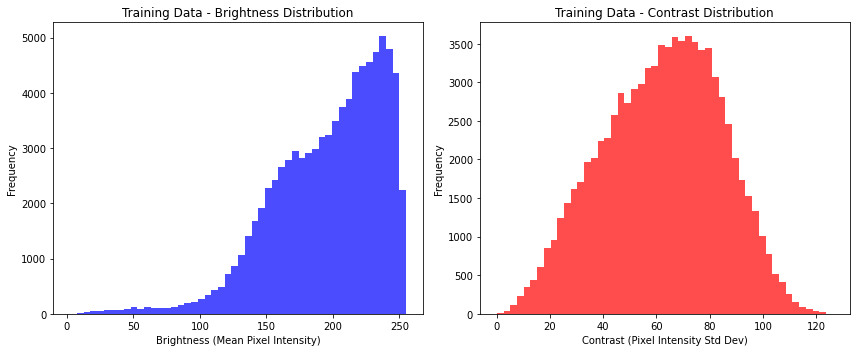


 'Testing Data - Brightness & Contrast Analysis
Total images analyzed: 13812
Brightness (Mean Pixel Intensity)
  - Min: 8.74
  - Max: 254.76
  - Avg: 196.56
Contrast (Pixel Intensity Standard Deviation)
  - Min: 1.94
  - Max: 124.14
  - Avg: 62.18


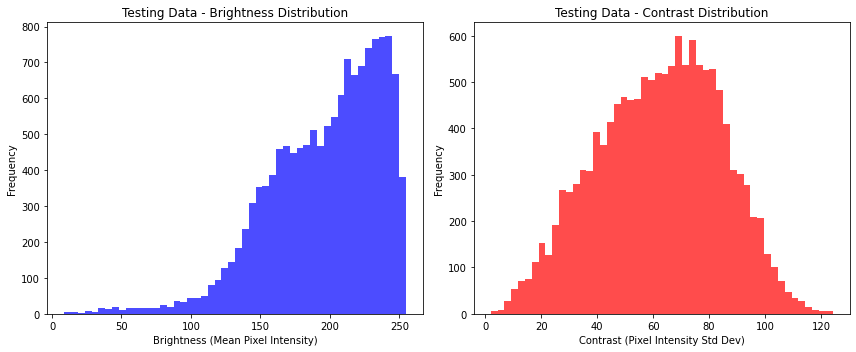

In [8]:
# Define image directories
train_image_dir = "../data/raw/images/image_train/"
test_image_dir = "../data/raw/images/image_test/"

# Run the analysis for training images
analyze_brightness_contrast(X_full_train, train_image_dir, dataset_name="Training Data")

# Run the analysis for testing images
analyze_brightness_contrast(X_test, test_image_dir, dataset_name="Testing Data")


### 4.4 Summary of Brightness & Contrast Analysis  


From the histograms, we can see the following patterns in both **training** and **testing** datasets:  

#### 🔹 **Brightness Analysis:**  
- Most images have a brightness between **150 and 250**, meaning they are neither too dark nor too bright.  
- **Very few images are underexposed (too dark, brightness < 50)**, so this is not a major issue.  
- Some images **reach the maximum intensity (255)**, which could mean some are overexposed (too bright).  

#### 🔹 **Contrast Analysis:**  
- Contrast follows a **normal distribution**, with most images having values between **60 and 80**, meaning they have a good balance between light and dark areas.  
- **Very low contrast images (< 20) are rare**, so most images keep enough detail.  
- A small number of images have **very high contrast (> 120)**, which could mean strong shadows or edited images.  

####  **Main Observations:**  
✔ No major issues with **underexposed (too dark) images**.  

/!\ Some images may be **overexposed (too bright)**.  

✔ Most images have **good contrast**, making details clear.  

/!\ A few images have **very high contrast**, which could be worth checking.  

----


## 5. Image Visualization: Sample, Random, and Category-Level Analysis 


**Display a Single Sample Image**
  - Training Data: Show one random image from X_full_train.
  - Testing Data: Show one random image from X_test.

**Display Multiple Random Images**
  - Training Data: Show a random selection of images (e.g., 9 images).
  - Testing Data: Show a random selection of images (e.g., 6 images).

**Display Multiple Images for a Specific Product Category**
  - Training Data: Show one representative image for a selection of product categories (e.g., 10 out of 27 categories).
  - Testing Data: Not applicable (since we don’t have category labels)

### 5.1 Display a Single Sample Image (Training & Testing Data)

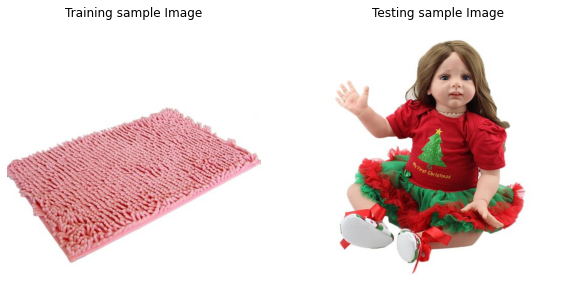

In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define image directories
train_image_dir = "../data/raw/images/image_train/"
test_image_dir = "../data/raw/images/image_test/"

# Select one random image from training and testing data
sample_train_img = X_full_train["image_name"].sample(1).values[0]
sample_test_img = X_test["image_name"].sample(1).values[0]

train_img_path = os.path.join(train_image_dir, sample_train_img)
test_img_path = os.path.join(test_image_dir, sample_test_img)

# Display images side by side
fig, axes = plt.subplots(1, 2, figsize=(10,5))

for ax, img_path, title in zip(axes, [train_img_path, test_img_path], ["Training sample Image", "Testing sample Image"]):
    if os.path.exists(img_path):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(title)
    else:
        ax.set_title("Missing Image")
        ax.axis("off")


plt.show()


### 5.2 Display Multiple Random Images (Training Data)  

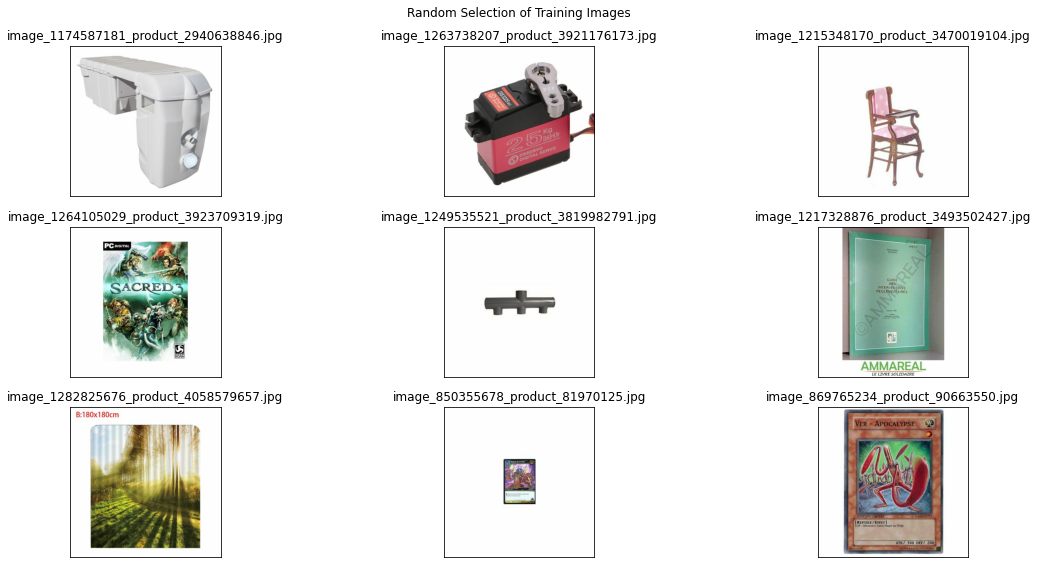

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import math

# Define the directory containing training images
train_image_dir = "../data/raw/images/image_train/"

# Number of images to be displayed
num_images = 9
num_cols = 3  # Number of columns in the grid

# Calculate the number of rows required
num_rows = math.ceil(num_images / num_cols)

# Select random images from the training dataset
random_images = X_full_train["image_name"].sample(n=num_images).tolist()

# Create a figure for displaying images
plt.figure(figsize=(18, 8))

# Loop through selected images and display them
for i, img_name in enumerate(random_images, start=1):
    img_path = os.path.join(train_image_dir, img_name)

    try:
        # Load and decode image
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)

        # Plot image
        plt.subplot(num_rows, num_cols, i)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        plt.title(img_name)

    except Exception as e:
        print(f"Error loading image: {img_name} | {e}")

plt.suptitle("Random Selection of Training Images")
plt.tight_layout()
plt.show()


### 5.3 Display Multiple Random Images (Testing Data)  

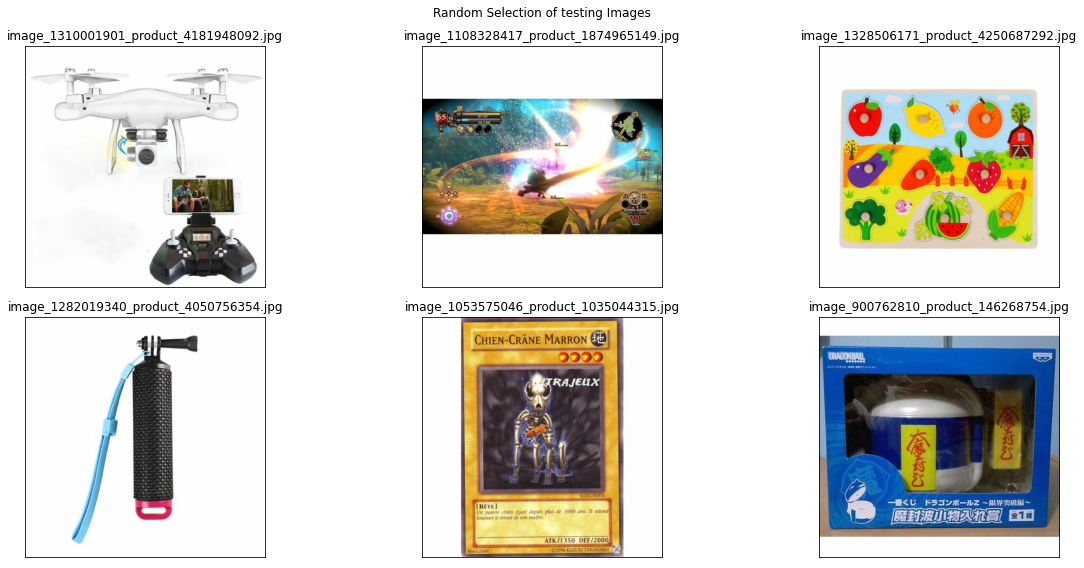

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import math

# Define the directory containing testing images
test_image_dir = "../data/raw/images/image_test/"

# Number of images to be displayed
num_images = 6
num_cols = 3  # Number of columns in the grid

# Calculate the number of rows required
num_rows = math.ceil(num_images / num_cols)

# Select random images from the testing dataset
random_images = X_test["image_name"].sample(n=num_images).tolist()

# Create a figure for displaying images
plt.figure(figsize=(18, 8))

# Loop through selected images and display them
for i, img_name in enumerate(random_images, start=1):
    img_path = os.path.join(test_image_dir, img_name)

    try:
        # Load and decode image
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)

        # Plot image
        plt.subplot(num_rows, num_cols, i)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        plt.title(img_name)

    except Exception as e:
        print(f"Error loading image: {img_name} | {e}")

plt.suptitle("Random Selection of testing Images")
plt.tight_layout()
plt.show()


### 5.4 Display Multiple Images for a Specific Product Category (Training Data Only)  

In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import math

# Define the directory for training images
train_image_dir = "../data/raw/images/image_train/"

def display_category_images(df, category_code, num_images=10, num_cols=3):
    """
    Display multiple images for a specific product category.

    Parameters:
    - df (pd.DataFrame): The dataset containing product information.
    - category_code (int): The product category (`prdtypecode`) to visualize.
    - num_images (int): Number of images to display (default: 10).
    - num_cols (int): Number of columns in the grid layout (default: 3).

    Returns:
    - Displays a grid of images for the selected category.
    """
    # Filter dataset for the selected product category
    category_images = df[df['prdtypecode'] == category_code]

    # Ensure we do not sample more images than available
    num_images = min(num_images, len(category_images))

    # Compute number of rows required
    num_rows = math.ceil(num_images / num_cols)

    # Select random images from the chosen category
    random_images = category_images.sample(n=num_images, random_state=42)

    # Create the figure
    plt.figure(figsize=(18, 8))

    # Loop through selected images and display them
    for i, (_, row) in enumerate(random_images.iterrows(), start=1):
        img_path = os.path.join(train_image_dir, row["image_name"])

        try:
            # Load and decode the image
            img = tf.io.read_file(img_path)
            img = tf.image.decode_jpeg(img, channels=3)

            # Plot image
            plt.subplot(num_rows, num_cols, i)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img)
            plt.title(f"{row['image_name']}", fontsize=9)

        except Exception as e:
            print(f"Error loading image: {row['image_name']} | {e}")

    plt.suptitle(f"Product Category: {category_code} ({num_images} Images)", fontsize=12, fontweight="bold")
    plt.tight_layout()
    plt.show()


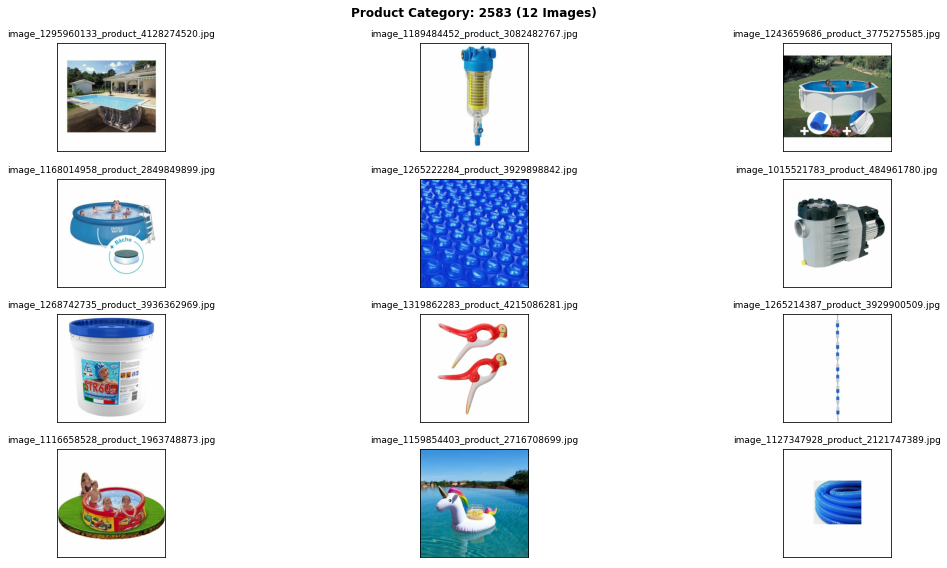

In [13]:
# Display images for category 2583
display_category_images(X_full_train, category_code=2583, num_images=12)

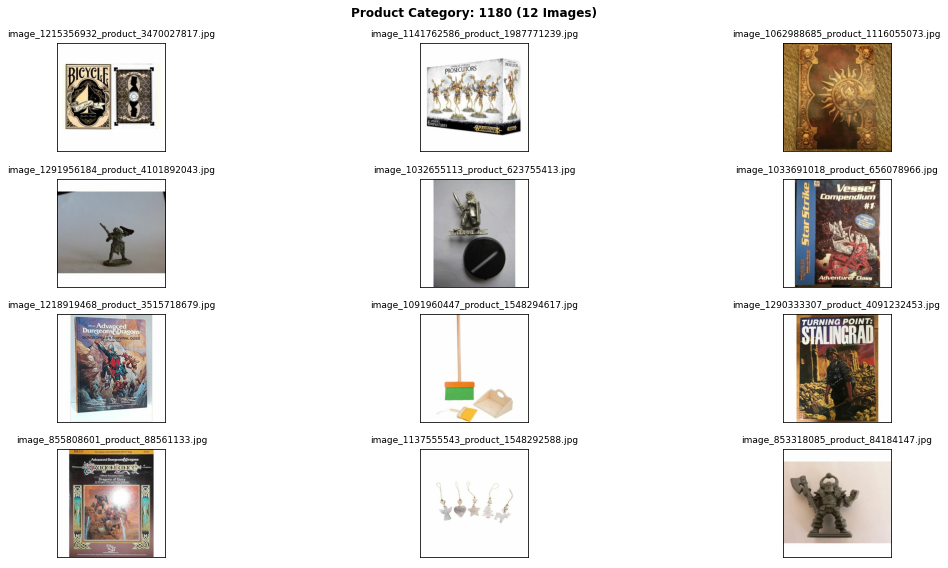

In [14]:
# Display images for category 1180
display_category_images(X_full_train, category_code=1180, num_images=12)

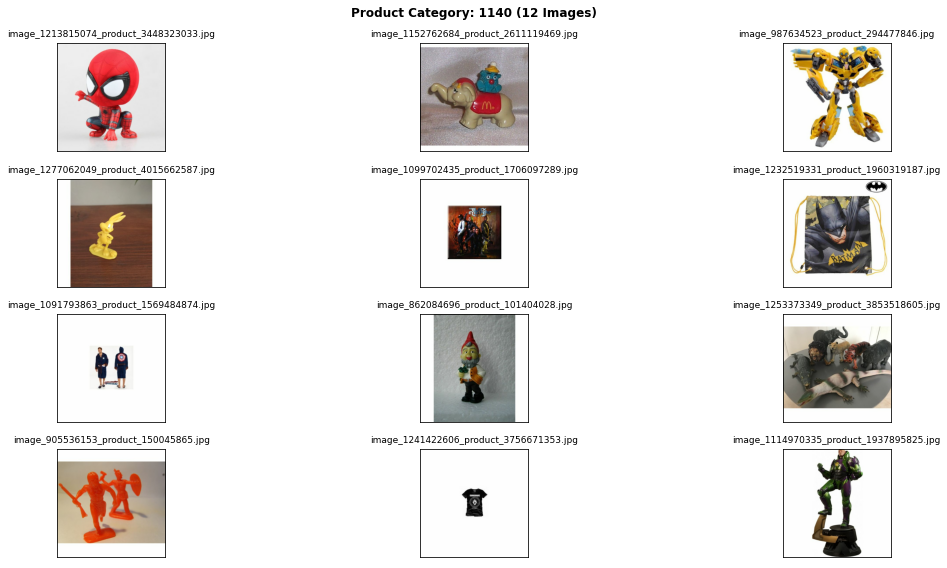

In [15]:
# Display images for category 1140
display_category_images(X_full_train, category_code=1140, num_images=12)


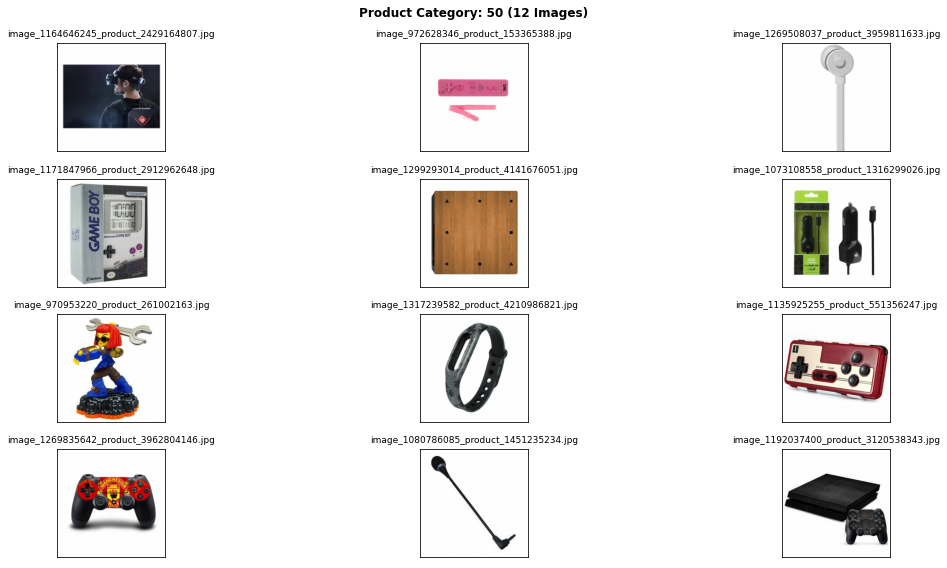

In [16]:
# Display images for category 50
display_category_images(X_full_train, category_code=50, num_images=12)

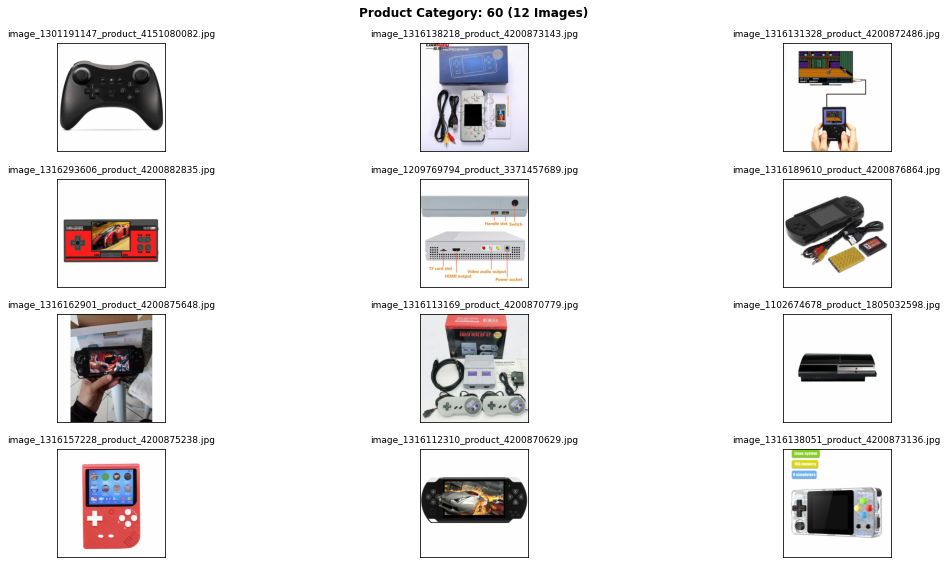

In [17]:
# Display images for category 60
display_category_images(X_full_train, category_code=60, num_images=12)

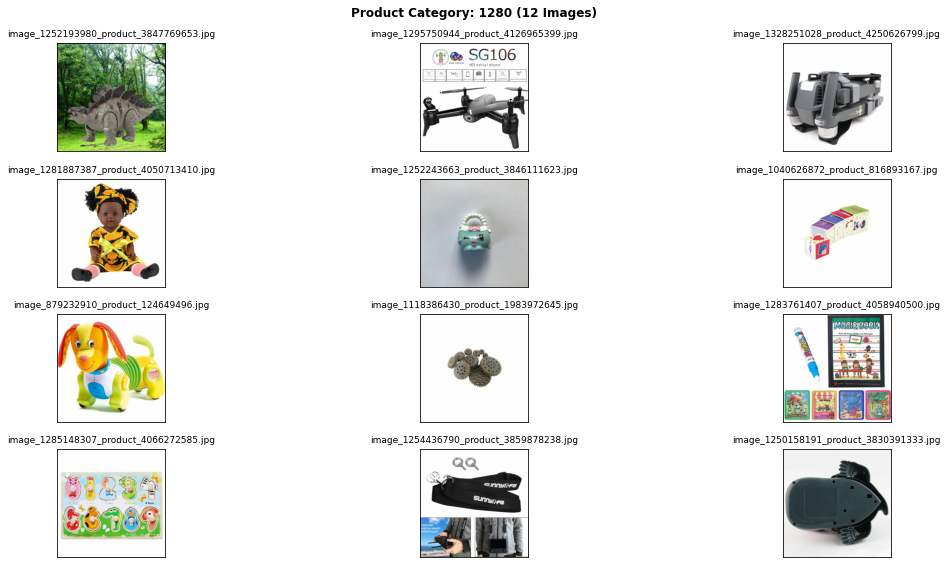

In [18]:
# Display images for category 1280
display_category_images(X_full_train, category_code=1280, num_images=12)

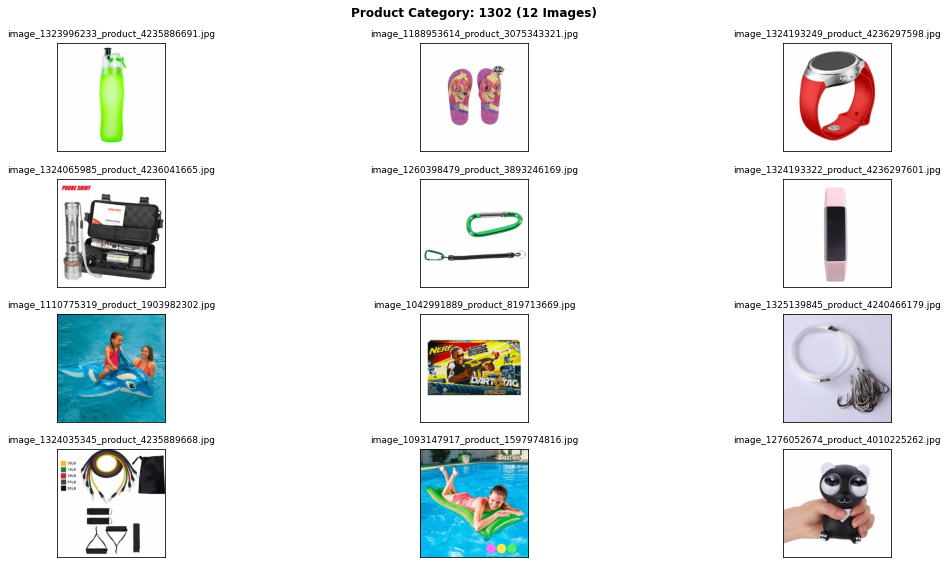

In [19]:
# Display images for category 1302
display_category_images(X_full_train, category_code=1302, num_images=12)

## 6. Analyzing Similarities Between Certain Classes   

In the previous section, we explored various **product categories** by displaying random samples from each class.  

During this exploration, we noticed that **some product categories share strong visual similarities**, making it difficult to distinguish between them.  

For example:  
- **Class 1180 and 1140** contain some images that appear visually close. 
- **Class 50 and 60** contain similar products.  
 

There may be other cases where different product categories look alike. To better understand these similarities, we will now take a closer look at how visually close some classes are.  


In [20]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the image directory path
image_dir = "../data/raw/images/image_train/"  # Adjust according to your file structure

def get_sample_images(df, class_label, num_samples=5):
    """
    Select a sample of image file paths for a given product class.

    Parameters:
    - df (pd.DataFrame): The dataset containing product image information.
    - class_label (int): The product category to filter images from.
    - num_samples (int): Number of images to select.

    Returns:
    - List of valid image file paths.
    """
    # Get all images corresponding to the given class
    class_images = df[df["prdtypecode"] == class_label]["image_name"].tolist()
    
    # Randomly select the required number of images (ensure at least some exist)
    selected_images = random.sample(class_images, min(num_samples, len(class_images)))
    
    # Generate full file paths and filter out non-existing files
    return [os.path.join(image_dir, img) for img in selected_images if os.path.exists(os.path.join(image_dir, img))]


def plot_image_comparison(df, class1, class2, num_samples=5):
    """
    Display a side-by-side comparison of images from two product classes.

    Parameters:
    - df (pd.DataFrame): The dataset containing image information.
    - class1 (int): The first product category to compare.
    - class2 (int): The second product category to compare.
    - num_samples (int): Number of images to display per class.

    Returns:
    - Displays a matplotlib plot comparing images from both classes.
    """
    # Retrieve image file paths for each class
    images_class1 = get_sample_images(df, class1, num_samples)
    images_class2 = get_sample_images(df, class2, num_samples)

    # Determine the number of images to display (use the minimum available)
    num_images = min(len(images_class1), len(images_class2))
    
    if num_images == 0:
        print(f"No images found for comparison between Class {class1} and Class {class2}.")
        return

    # Create a figure for side-by-side visualization
    fig, axes = plt.subplots(num_images, 2, figsize=(8, 3 * num_images))

    for i in range(num_images):
        # Display an image from Class 1
        img1 = Image.open(images_class1[i])
        axes[i, 0].imshow(img1)
        axes[i, 0].axis("off")
        axes[i, 0].set_title(f"Class {class1}")

        # Display an image from Class 2
        img2 = Image.open(images_class2[i])
        axes[i, 1].imshow(img2)
        axes[i, 1].axis("off")
        axes[i, 1].set_title(f"Class {class2}")

    plt.tight_layout()
    plt.show()


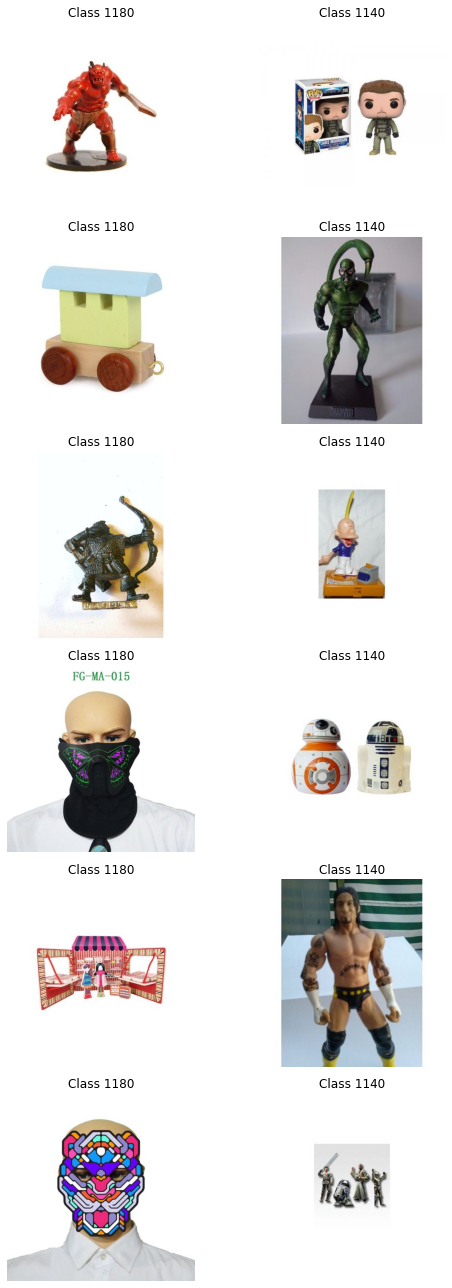

In [21]:
# Call the function to compare Class 1180 vs Class 1140
plot_image_comparison(X_full_train, 1180, 1140, num_samples=6)

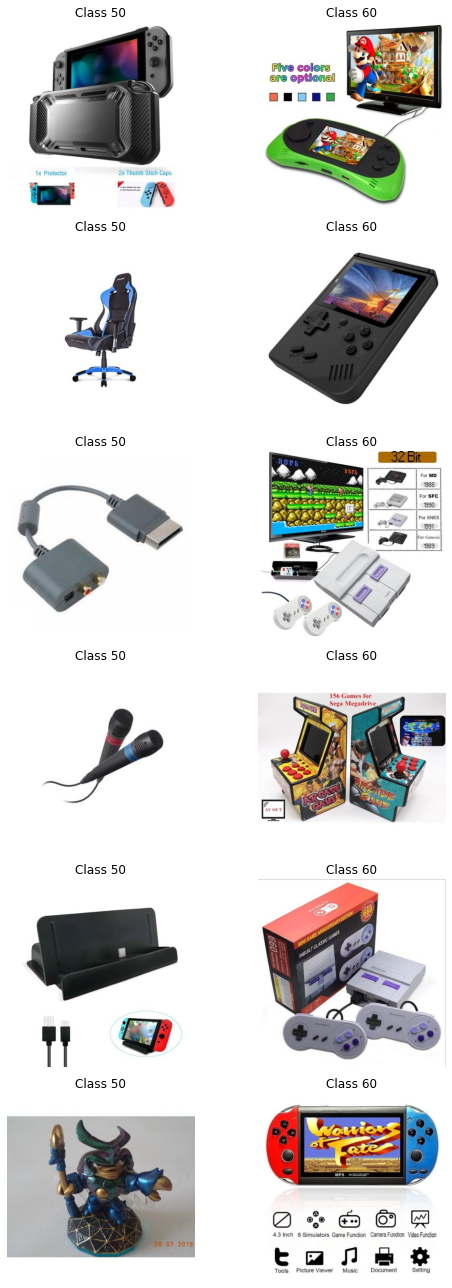

In [22]:
# Call the function to compare Class 50 vs Class 60
plot_image_comparison(X_full_train, 50, 60, num_samples=6)

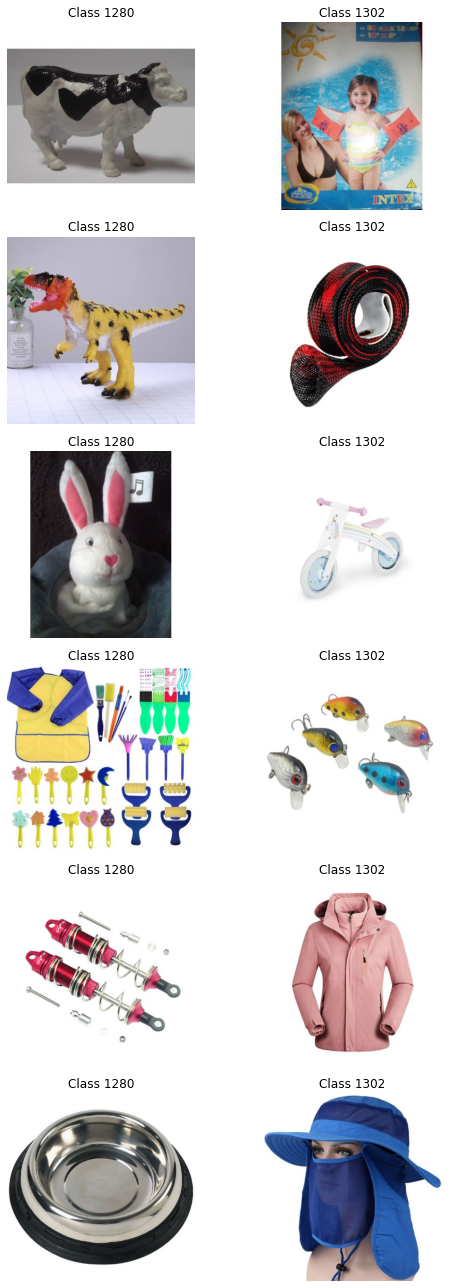

In [23]:
# Call the function to compare Class 1280 vs Class 1302
plot_image_comparison(X_full_train, 1280, 1302, num_samples=6)

## 7. Observations from Image Analysis  

After analyzing image availability, properties, and visualization, we have identified key insights regarding the dataset.

---

### 7.1 Image Availability  
- All expected images are present in both the training and testing datasets.  
- No missing images or extra files were found in the respective folders.  

**Conclusion:** The dataset is complete, and all images are correctly linked to their metadata.

---

### 7.2 Image Properties Analysis  

#### 7.2.1 Image Size & Format  
- All training and testing images have the same dimensions: (500, 500).  
- All images are in JPEG format across both datasets.  


#### 7.2.2 Image Color Mode  
- 100% of images are in RGB format for both training and testing datasets.  
- No grayscale images were detected.  

**Conclusion:** Since all images are in color, no conversion is necessary before training the model.

#### 7.2.3 Analyzing Brightness & Contrast for Training and Testing Data  

- The majority of images have a **brightness between 150 and 250**, meaning they are well-lit.  
- **Few images are underexposed (brightness < 50)**, so dark images are not a major issue.  
- Some images **reach the maximum intensity (255)**, indicating possible overexposure.  
- **Contrast is normally distributed**, peaking around **60-80**, meaning most images have a good balance of light and dark areas.  
- A few images have **very high contrast (> 120)**, which might need further review.  

**Conclusion:**  
- No significant problems with **underexposed images**, but some **overexposed** images exist.  
- The dataset mostly maintains a **good contrast balance**, but a few **high-contrast images** may require preprocessing adjustments.  
---
  
### 7.3 Image Visualization: Identifying Potential Issues  
- Certain classes exhibit **strong visual similarities**, which could affect classification:  
  - **Class 1180 and 1140** contain highly similar images.  
  - **Class 50 and 60** share overlapping visual features.  
  - **Class 1280 and 1302** also appear visually close.  
- Some images contain **large white backgrounds**, making them look like **small thumbnails**.  

**🔹 Conclusion:**  
- **Class similarity** might cause **misclassification issues** → Requires further investigation with feature-based analysis.  
- **White background issues** could impact the model's performance → Might need **image preprocessing techniques** (cropping, augmentation).  


## 8. Saving Updated Datasets for Future Use

To avoid reloading and recomputing the datasets in every notebook, we save them as Pickle files.  

###  Previously Saved Datasets  
In the previous notebook, we stored:  
- **`X_full_train.pkl`** → Training dataset including product metadata and labels.  
- **`X_test.pkl`** → Test dataset, used for final submission.  
- **`y_train.pkl`** → Target labels, stored separately for flexibility.  

###  Why Save Updated Files?  
In this notebook, we have **generated image filenames** by combining `imageid` and `productid`.  
To ensure consistency across future analyses, we **save the updated datasets** containing these filenames.  

###  Newly Saved Datasets  
✔ **`df_train_img.pkl`** → Includes training features, labels, and generated image filenames.  
✔ **`X_test_img.pkl`** → Includes test dataset with generated image filenames.  

These files will be used in **Text and Image preprocessing, model training, and evaluation** in later notebooks.  


In [24]:
import os
import pickle

# Define the directory and file names
pickle_dir = "../data/interim/"
os.makedirs(pickle_dir, exist_ok=True)

# Define file paths
train_pickle_path = os.path.join(pickle_dir, "X_train_img.pkl")
test_pickle_path = os.path.join(pickle_dir, "X_test_img.pkl")

# Remove the 'color_mode' column as it was used only for analysis and is no longer needed
if "color_mode" in X_full_train.columns:
    X_full_train.drop(columns=["color_mode"], inplace=True)
if "color_mode" in X_test.columns:
    X_test.drop(columns=["color_mode"], inplace=True)

print(" 'color_mode' column removed. It was used for image color analysis and is no longer needed.")

try:
    # Save updated training dataset
    X_full_train.to_pickle(train_pickle_path)
    print(f" Training dataset saved: {train_pickle_path}")

    # Save updated test dataset
    X_test.to_pickle(test_pickle_path)
    print(f" Test dataset saved: {test_pickle_path}")

except Exception as e:
    print(f" Error saving datasets: {e}")


 'color_mode' column removed. It was used for image color analysis and is no longer needed.
 Training dataset saved: ../data/interim/X_train_img.pkl
 Test dataset saved: ../data/interim/X_test_img.pkl


## 9. 🔄 Next Steps  

Now that we have explored the image dataset and saved the updated files, we will focus on **text preprocessing**.  


We will apply techniques such as:  
✔ Removing special characters and punctuation  
✔ Lowercasing text for consistency  
✔ Handling missing values in product descriptions  
✔ Tokenization and vectorization 

### 📌 What About Image Preprocessing?  
For **image preprocessing**, we will handle it later during the **CNN deep learning modeling phase**.  
At that stage, we will:  
✔ Apply image augmentation techniques (if necessary)  
✔ Normalize pixel values for CNN models  
✔ Resize/crop images if needed for input consistency  

➡️ **Proceed to `4_Text_Cleaning.ipynb` for text cleaning.**  
